<a href="https://colab.research.google.com/github/Angel353/CADII_Equipo1/blob/main/Airbnb_Bases/CDMX/Regresi%C3%B3n_Lineal%20/R_Simple/Home_apt_CDMX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Leer la base de la cdmx limpia
df= pd.read_csv("Mexico_Outliers_y_Categorización.csv")
df.drop("Unnamed: 0", axis = 1, inplace = True)
df.head(6)


,last_scraped,source,host_name,host_response_time,host_verifications,neighbourhood_cleansed,property_type,room_type,bathrooms_text,amenities,...,hostAcceptanceCat,hostVerifCat,neighbourhood_Category_num,bedsCategory,reviewsMonthCat,reviewScoresCat,reviewLocationCat,reviewRatingCat,reviewCleanCat,reviewCommunicationCat
0,2024-06-28,city scrape,Marco,within an hour,"['email', 'phone']",Cuauhtémoc,Entire rental unit,Entire home/apt,1 bath,"[""40 inch HDTV with Amazon Prime Video, Netfli...",...,(83 - 91%) Alto,(2) Verificación moderada,1,(2) Pocas camas,(0) Sin reseñas,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho
1,2024-06-27,city scrape,Dici,a few days or more,"['email', 'phone', 'work_email']",Cuajimalpa de Morelos,Entire villa,Entire home/apt,1 bath,"[""Hot water"", ""Washer"", ""Bed linens"", ""Wifi"", ...",...,(83 - 91%) Alto,(3) Verificación completa,2,(0 - 1) Una cama,(1) Reseña mensual mínima,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho
2,2024-06-28,city scrape,Fernando,within an hour,"['email', 'phone', 'work_email']",Cuauhtémoc,Entire home,Entire home/apt,5.5 baths,"[""Wifi"", ""Coffee maker: Nespresso"", ""Host gree...",...,(92 - 100%) Excelente,(3) Verificación completa,1,(2) Pocas camas,(0) Sin reseñas,(4) Satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho
3,2024-06-28,city scrape,Martina,within an hour,"['email', 'phone']",Miguel Hidalgo,Entire serviced apartment,Entire home/apt,1 bath,"[""Wifi"", ""Host greets you"", ""Coffee maker"", ""S...",...,(92 - 100%) Excelente,(2) Verificación moderada,2,(2) Pocas camas,(1) Reseña mensual mínima,(5) Muy satisfecho,(4) Satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho
4,2024-06-28,city scrape,Nicholas,within a day,"['email', 'phone']",Cuauhtémoc,Entire rental unit,Entire home/apt,1 bath,"[""Wifi"", ""Coffee maker"", ""Sound system"", ""Clot...",...,(56 - 64%) Aceptable,(2) Verificación moderada,1,(2) Pocas camas,(0) Sin reseñas,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho
5,2024-06-28,city scrape,Alex,within an hour,"['email', 'phone', 'work_email']",Cuauhtémoc,Tiny home,Entire home/apt,1 bath,"[""Wifi"", ""Mini fridge"", ""Host greets you"", ""Pa...",...,(92 - 100%) Excelente,(3) Verificación completa,1,(0 - 1) Una cama,(2 - 5) Reseñas mensuales moderadas,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho


In [3]:
#Realizamos un conteo de los tipos de habitaciones
df[["room_type","room_type_num"]].value_counts()

,,count
room_type,room_type_num,
Entire home/apt,0,17432
Private room,2,8581
Shared room,3,401
Hotel room,1,122


In [4]:
#Realizamos un frame con las variables a utilizar
df1 = df[["room_type_num","host_acceptance_rate","host_response_rate","review_scores_location","review_scores_cleanliness",
          "price","availability_365", "number_of_reviews", "reviews_per_month","review_scores_communication","number_of_reviews_ltm"]]

In [5]:
df1["room_type_num"].value_counts()

,count
room_type_num,
0,17432
2,8581
3,401
1,122


## División del frame por tipo de habitación

Entire home/apt no. 0

In [6]:
df_home_apt=df1[df1["room_type_num"]== 0]
df_home_apt

,room_type_num,host_acceptance_rate,host_response_rate,review_scores_location,review_scores_cleanliness,price,availability_365,number_of_reviews,reviews_per_month,review_scores_communication,number_of_reviews_ltm
0,0,88.0,100.0,5.0,5.0,1652.0,262,56.0,0.41,5.0,3
1,0,89.8,0.0,5.0,5.0,3663.0,363,0.0,1.13,5.0,0
2,0,92.0,100.0,5.0,5.0,1275.0,364,64.0,0.42,5.0,0
3,0,96.0,100.0,4.0,5.0,814.0,236,161.0,1.19,5.0,6
4,0,62.0,89.0,5.0,5.0,1923.0,361,49.0,0.32,5.0,4
...,...,...,...,...,...,...,...,...,...,...,...
26531,0,100.0,100.0,5.0,5.0,7850.0,365,0.0,1.13,5.0,0
26532,0,91.0,97.0,5.0,5.0,1478.0,363,0.0,1.13,5.0,0
26533,0,100.0,100.0,5.0,5.0,936.0,363,0.0,1.13,5.0,0
26534,0,100.0,100.0,5.0,5.0,768.0,254,0.0,1.13,5.0,0


# Filtro de “host_acceptance_rate vs host_response_rate”

<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

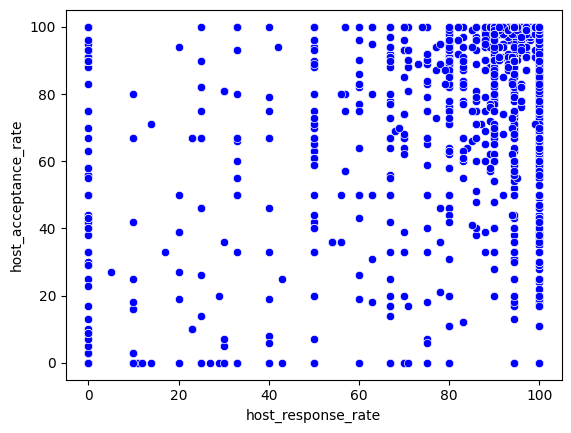

In [7]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión
from turtle import color

sns.scatterplot(x ='host_response_rate' , y='host_acceptance_rate', color="blue", data=df_home_apt)

In [8]:
#Declaramos las variables dependientes e independientes para la regresión lineal

Vars_Indep= df_home_apt[['host_response_rate']]
var_Dep= df_home_apt['host_acceptance_rate']

In [9]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [10]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [11]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=var_Dep)

LinearRegression()

In [12]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_response_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.6204858]),
 'rank_': 1,
 'singular_': array([1858.85689008]),
 'intercept_': 32.86318561247308}

**Modelo matemático: y = 0.6204858 + 32.86318561247308**

---



In [13]:
#Predecimos los valores de host_response_rate a partir de la variable host_acceptance_rate
y_pred= model.predict(X=df_home_apt[['host_response_rate']])
y_pred

array([94.91176521, 32.86318561, 94.91176521, ..., 94.91176521,
       94.91176521, 94.91176521])

In [14]:
#Insertamos la columna de predicciones en el DataFrame
df_home_apt.insert(0, 'Predict1', y_pred)
df_home_apt

,Predict1,room_type_num,host_acceptance_rate,host_response_rate,review_scores_location,review_scores_cleanliness,price,availability_365,number_of_reviews,reviews_per_month,review_scores_communication,number_of_reviews_ltm
0,94.911765,0,88.0,100.0,5.0,5.0,1652.0,262,56.0,0.41,5.0,3
1,32.863186,0,89.8,0.0,5.0,5.0,3663.0,363,0.0,1.13,5.0,0
2,94.911765,0,92.0,100.0,5.0,5.0,1275.0,364,64.0,0.42,5.0,0
3,94.911765,0,96.0,100.0,4.0,5.0,814.0,236,161.0,1.19,5.0,6
4,88.086421,0,62.0,89.0,5.0,5.0,1923.0,361,49.0,0.32,5.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...
26531,94.911765,0,100.0,100.0,5.0,5.0,7850.0,365,0.0,1.13,5.0,0
26532,93.050308,0,91.0,97.0,5.0,5.0,1478.0,363,0.0,1.13,5.0,0
26533,94.911765,0,100.0,100.0,5.0,5.0,936.0,363,0.0,1.13,5.0,0
26534,94.911765,0,100.0,100.0,5.0,5.0,768.0,254,0.0,1.13,5.0,0


<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

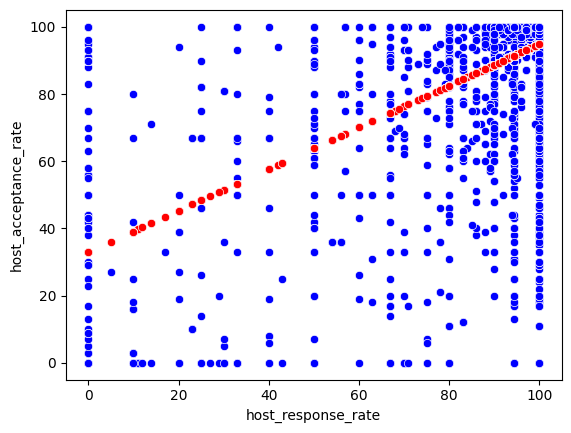

In [15]:
#Visualizamos la gráica comparativa

sns.scatterplot(x='host_response_rate', y='host_acceptance_rate', color='blue', data=df_home_apt)
sns.scatterplot(x='host_response_rate', y='Predict1', color='red', data=df_home_apt)


In [16]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo (R cuadrada)
coef_Deter=model.score(X=Vars_Indep, y=var_Dep)
coef_Deter
#Más cercano al 0 es malo (no hay relación) y más cercano a 1 es bueno (Perfecto)

0.21608367553468089

In [17]:
#Corroboramos cual es el coeficiente de correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl
##Más cercano al 0 es malo (no hay relación) y más cercano a 1 es bueno (Perfecto)

0.464848013370694

## Filtro de "“host_acceptance_rate vs price”

<Axes: xlabel='price', ylabel='host_acceptance_rate'>

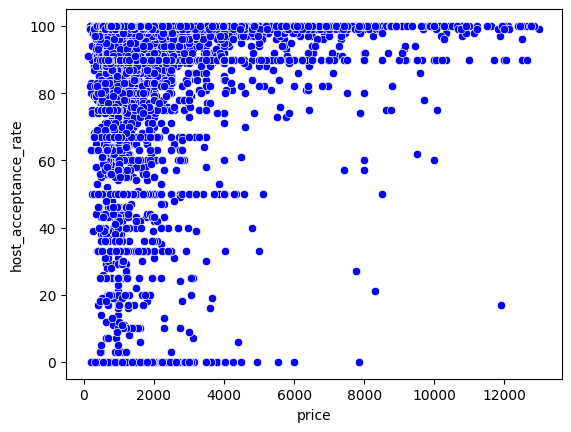

In [18]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión
from turtle import color

sns.scatterplot(x = 'price', y='host_acceptance_rate', color="blue", data=df_home_apt)

In [19]:
#Declaramos las variables dependientes e independientes para la regresión lineal

Vars_Indep= df_home_apt[['price']]
var_Dep= df_home_apt['host_acceptance_rate']

In [20]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [21]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [22]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=var_Dep)

LinearRegression()

In [23]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['price'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.00066124]),
 'rank_': 1,
 'singular_': array([166562.12604627]),
 'intercept_': 91.3466691471023}

**Modelo matemático: Y = 0.00066124x + 91.3466691471023**

In [24]:
#Predecimos los valores de price a partir de la variable host_acceptance_rate
y_pred= model.predict(X=df_home_apt[['price']])
y_pred

array([92.43903471, 93.7687848 , 92.1897479 , ..., 91.96558813,
       91.85450011, 92.20760133])

In [25]:
#Insertamos la columna de predicciones en el DataFrame
df_home_apt.insert(1, 'Predict2', y_pred)
df_home_apt

,Predict1,Predict2,room_type_num,host_acceptance_rate,host_response_rate,review_scores_location,review_scores_cleanliness,price,availability_365,number_of_reviews,reviews_per_month,review_scores_communication,number_of_reviews_ltm
0,94.911765,92.439035,0,88.0,100.0,5.0,5.0,1652.0,262,56.0,0.41,5.0,3
1,32.863186,93.768785,0,89.8,0.0,5.0,5.0,3663.0,363,0.0,1.13,5.0,0
2,94.911765,92.189748,0,92.0,100.0,5.0,5.0,1275.0,364,64.0,0.42,5.0,0
3,94.911765,91.884917,0,96.0,100.0,4.0,5.0,814.0,236,161.0,1.19,5.0,6
4,88.086421,92.618230,0,62.0,89.0,5.0,5.0,1923.0,361,49.0,0.32,5.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26531,94.911765,96.537389,0,100.0,100.0,5.0,5.0,7850.0,365,0.0,1.13,5.0,0
26532,93.050308,92.323979,0,91.0,97.0,5.0,5.0,1478.0,363,0.0,1.13,5.0,0
26533,94.911765,91.965588,0,100.0,100.0,5.0,5.0,936.0,363,0.0,1.13,5.0,0
26534,94.911765,91.854500,0,100.0,100.0,5.0,5.0,768.0,254,0.0,1.13,5.0,0


<Axes: xlabel='price', ylabel='host_acceptance_rate'>

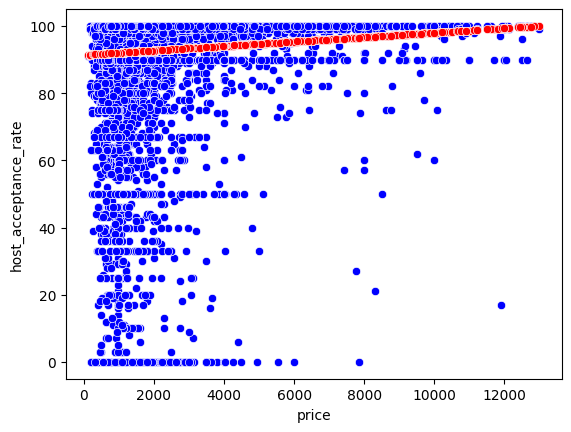

In [26]:
#Visualizamos la gráica comparativa

sns.scatterplot(x='price', y='host_acceptance_rate', color='blue', data=df_home_apt)
sns.scatterplot(x='price', y='Predict2', color='red', data=df_home_apt)


In [27]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo (R cuadrada)
coef_Deter=model.score(X=Vars_Indep, y=var_Dep)
coef_Deter
#Más cercano al 0 es malo (no hay relación) y más cercano a 1 es bueno (Perfecto)

0.0019703110141577884

In [28]:
#Corroboramos cual es el coeficiente de correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl
##Más cercano al 0 es malo (no hay relación) y más cercano a 1 es bueno (Perfecto)

0.04438818552450402

## Filtro para “host_acceptance_rate vs number_of_reviews ”

<Axes: xlabel='host_acceptance_rate', ylabel='number_of_reviews'>

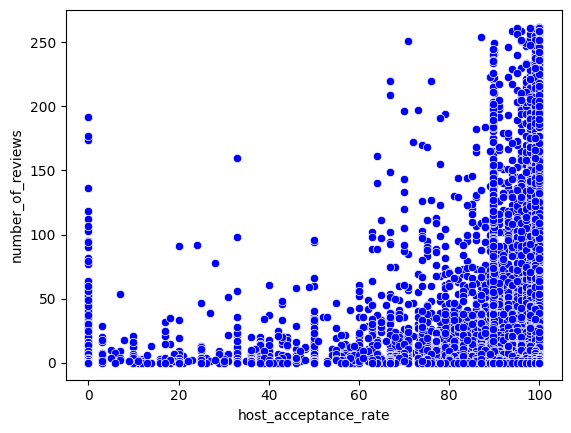

In [29]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión
from turtle import color

sns.scatterplot(x = 'host_acceptance_rate', y='number_of_reviews', color="blue", data=df_home_apt)

In [30]:
#Declaramos las variables dependientes e independientes para la regresión lineal

Vars_Indep= df_home_apt[['host_acceptance_rate']]
var_Dep= df_home_apt['number_of_reviews']

In [31]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [32]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [33]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=var_Dep)

LinearRegression()

In [34]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.50525857]),
 'rank_': 1,
 'singular_': array([2481.22884001]),
 'intercept_': -5.360150384944006}

**Modelo matemático: y = 0.50525857x -5.360150384944006**

In [35]:
#Predecimos los valores de number_of_reviews a partir de la variable host_acceptance_rate
y_pred= model.predict(X=df_home_apt[['host_acceptance_rate']])
y_pred

array([39.10260371, 40.01206914, 41.12363799, ..., 45.16570654,
       45.16570654, 38.59734514])

In [36]:
#Insertamos la columna de predicciones en el DataFrame
df_home_apt.insert(2, 'Predict3', y_pred)
df_home_apt

,Predict1,Predict2,Predict3,room_type_num,host_acceptance_rate,host_response_rate,review_scores_location,review_scores_cleanliness,price,availability_365,number_of_reviews,reviews_per_month,review_scores_communication,number_of_reviews_ltm
0,94.911765,92.439035,39.102604,0,88.0,100.0,5.0,5.0,1652.0,262,56.0,0.41,5.0,3
1,32.863186,93.768785,40.012069,0,89.8,0.0,5.0,5.0,3663.0,363,0.0,1.13,5.0,0
2,94.911765,92.189748,41.123638,0,92.0,100.0,5.0,5.0,1275.0,364,64.0,0.42,5.0,0
3,94.911765,91.884917,43.144672,0,96.0,100.0,4.0,5.0,814.0,236,161.0,1.19,5.0,6
4,88.086421,92.618230,25.965881,0,62.0,89.0,5.0,5.0,1923.0,361,49.0,0.32,5.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26531,94.911765,96.537389,45.165707,0,100.0,100.0,5.0,5.0,7850.0,365,0.0,1.13,5.0,0
26532,93.050308,92.323979,40.618379,0,91.0,97.0,5.0,5.0,1478.0,363,0.0,1.13,5.0,0
26533,94.911765,91.965588,45.165707,0,100.0,100.0,5.0,5.0,936.0,363,0.0,1.13,5.0,0
26534,94.911765,91.854500,45.165707,0,100.0,100.0,5.0,5.0,768.0,254,0.0,1.13,5.0,0


<Axes: xlabel='host_acceptance_rate', ylabel='number_of_reviews'>

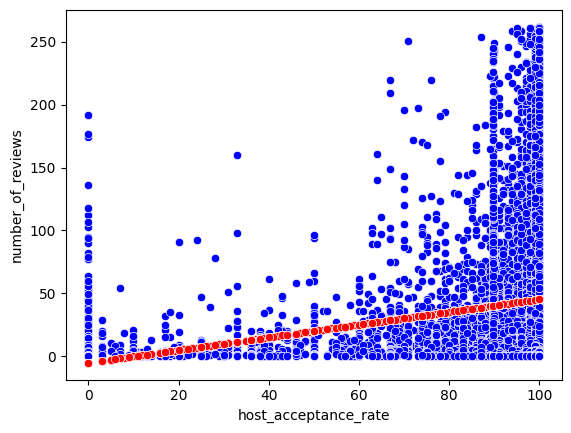

In [37]:
#Visualizamos la gráica comparativa

sns.scatterplot(x='host_acceptance_rate', y='number_of_reviews', color='blue', data=df_home_apt)
sns.scatterplot(x='host_acceptance_rate', y='Predict3', color='red', data=df_home_apt)

In [38]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo (R cuadrada)
coef_Deter=model.score(X=Vars_Indep, y=var_Dep)
coef_Deter
#Más cercano al 0 es malo (no hay relación) y más cercano a 1 es bueno (Perfecto)

0.034018897917829305

In [39]:
#Corroboramos cual es el coeficiente de correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl
##Más cercano al 0 es malo (no hay relación) y más cercano a 1 es bueno (Perfecto)

0.18444212620176906

# Filtro de "“review_scores_location vs review_scores_cleanliness”

<Axes: xlabel='review_scores_location', ylabel='review_scores_cleanliness'>

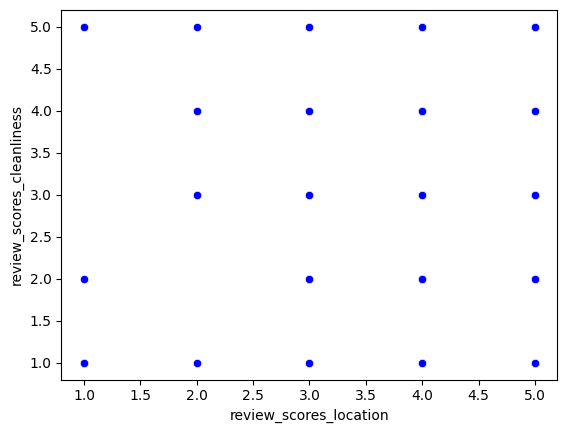

In [40]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión
from turtle import color

sns.scatterplot(x = 'review_scores_location', y='review_scores_cleanliness', color="blue", data=df_home_apt)

In [41]:
#Declaramos las variables dependientes e independientes para la regresión lineal

Vars_Indep= df_home_apt[['review_scores_location']]
var_Dep= df_home_apt['review_scores_cleanliness']

In [42]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [43]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [44]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=var_Dep)

LinearRegression()

In [45]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_location'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.537424]),
 'rank_': 1,
 'singular_': array([36.73282411]),
 'intercept_': 2.240297650559472}

**Modelo matemático: Y = 0.537424x +  2.240297650559472**

In [46]:
#Predecimos los valores de review_scores_cleanliness a partir de la variable review_scores_location
y_pred= model.predict(X=df_home_apt[['review_scores_location']])
y_pred

array([4.92741764, 4.92741764, 4.92741764, ..., 4.92741764, 4.92741764,
       4.92741764])

In [47]:
#Insertamos la columna de predicciones en el DataFrame
df_home_apt.insert(3, 'Predict4', y_pred)
df_home_apt

,Predict1,Predict2,Predict3,Predict4,room_type_num,host_acceptance_rate,host_response_rate,review_scores_location,review_scores_cleanliness,price,availability_365,number_of_reviews,reviews_per_month,review_scores_communication,number_of_reviews_ltm
0,94.911765,92.439035,39.102604,4.927418,0,88.0,100.0,5.0,5.0,1652.0,262,56.0,0.41,5.0,3
1,32.863186,93.768785,40.012069,4.927418,0,89.8,0.0,5.0,5.0,3663.0,363,0.0,1.13,5.0,0
2,94.911765,92.189748,41.123638,4.927418,0,92.0,100.0,5.0,5.0,1275.0,364,64.0,0.42,5.0,0
3,94.911765,91.884917,43.144672,4.389994,0,96.0,100.0,4.0,5.0,814.0,236,161.0,1.19,5.0,6
4,88.086421,92.618230,25.965881,4.927418,0,62.0,89.0,5.0,5.0,1923.0,361,49.0,0.32,5.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26531,94.911765,96.537389,45.165707,4.927418,0,100.0,100.0,5.0,5.0,7850.0,365,0.0,1.13,5.0,0
26532,93.050308,92.323979,40.618379,4.927418,0,91.0,97.0,5.0,5.0,1478.0,363,0.0,1.13,5.0,0
26533,94.911765,91.965588,45.165707,4.927418,0,100.0,100.0,5.0,5.0,936.0,363,0.0,1.13,5.0,0
26534,94.911765,91.854500,45.165707,4.927418,0,100.0,100.0,5.0,5.0,768.0,254,0.0,1.13,5.0,0


<Axes: xlabel='review_scores_location', ylabel='review_scores_cleanliness'>

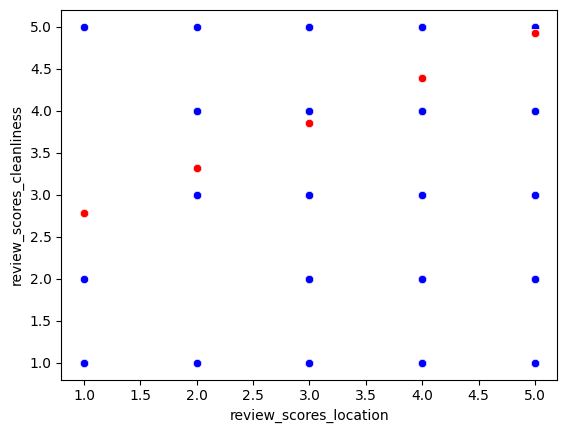

In [48]:
#Visualizamos la gráica comparativa

sns.scatterplot(x='review_scores_location', y='review_scores_cleanliness', color='blue', data=df_home_apt)
sns.scatterplot(x='review_scores_location', y='Predict4', color='red', data=df_home_apt)


In [49]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo (R cuadrada)
coef_Deter=model.score(X=Vars_Indep, y=var_Dep)
coef_Deter
#Más cercano al 0 es malo (no hay relación) y más cercano a 1 es bueno (Perfecto)

0.16880650223135274

In [50]:
#Corroboramos cual es el coeficiente de correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl
##Más cercano al 0 es malo (no hay relación) y más cercano a 1 es bueno (Perfecto)

0.41086068469902637

# Filtro para “availability_365 vs number_of_reviews”

<Axes: xlabel='availability_365', ylabel='number_of_reviews'>

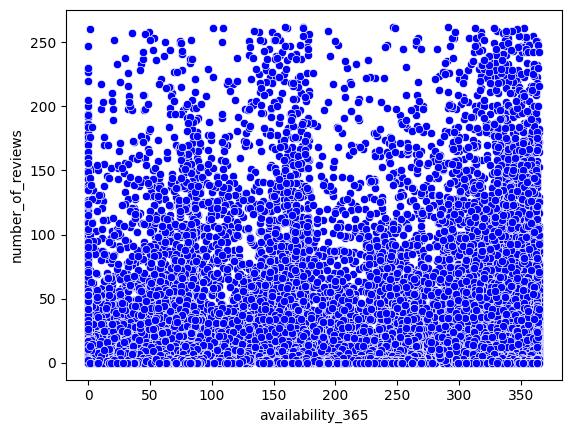

In [51]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión
from turtle import color

sns.scatterplot(x = 'availability_365', y='number_of_reviews', color="blue", data=df_home_apt)

In [52]:
#Declaramos las variables dependientes e independientes para la regresión lineal

Vars_Indep= df_home_apt[['availability_365']]
var_Dep= df_home_apt['number_of_reviews']

In [53]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [54]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [55]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=var_Dep)

LinearRegression()

In [56]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['availability_365'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.00750212]),
 'rank_': 1,
 'singular_': array([16126.45450896]),
 'intercept_': 39.61819987272778}

**Modelo matemático: Y = 0.00750212x + 39.61819987272778**

In [57]:
#Predecimos los valores de number_of_reviews a partir de la variable availability_365
y_pred= model.predict(X=df_home_apt[['availability_365']])
y_pred

array([41.58375524, 42.34146933, 42.34897145, ..., 42.34146933,
       41.52373828, 42.25894602])

In [58]:
#Insertamos la columna de predicciones en el DataFrame
df_home_apt.insert(4, 'Predict5', y_pred)
df_home_apt

,Predict1,Predict2,Predict3,Predict4,Predict5,room_type_num,host_acceptance_rate,host_response_rate,review_scores_location,review_scores_cleanliness,price,availability_365,number_of_reviews,reviews_per_month,review_scores_communication,number_of_reviews_ltm
0,94.911765,92.439035,39.102604,4.927418,41.583755,0,88.0,100.0,5.0,5.0,1652.0,262,56.0,0.41,5.0,3
1,32.863186,93.768785,40.012069,4.927418,42.341469,0,89.8,0.0,5.0,5.0,3663.0,363,0.0,1.13,5.0,0
2,94.911765,92.189748,41.123638,4.927418,42.348971,0,92.0,100.0,5.0,5.0,1275.0,364,64.0,0.42,5.0,0
3,94.911765,91.884917,43.144672,4.389994,41.388700,0,96.0,100.0,4.0,5.0,814.0,236,161.0,1.19,5.0,6
4,88.086421,92.618230,25.965881,4.927418,42.326465,0,62.0,89.0,5.0,5.0,1923.0,361,49.0,0.32,5.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26531,94.911765,96.537389,45.165707,4.927418,42.356474,0,100.0,100.0,5.0,5.0,7850.0,365,0.0,1.13,5.0,0
26532,93.050308,92.323979,40.618379,4.927418,42.341469,0,91.0,97.0,5.0,5.0,1478.0,363,0.0,1.13,5.0,0
26533,94.911765,91.965588,45.165707,4.927418,42.341469,0,100.0,100.0,5.0,5.0,936.0,363,0.0,1.13,5.0,0
26534,94.911765,91.854500,45.165707,4.927418,41.523738,0,100.0,100.0,5.0,5.0,768.0,254,0.0,1.13,5.0,0


<Axes: xlabel='availability_365', ylabel='number_of_reviews'>

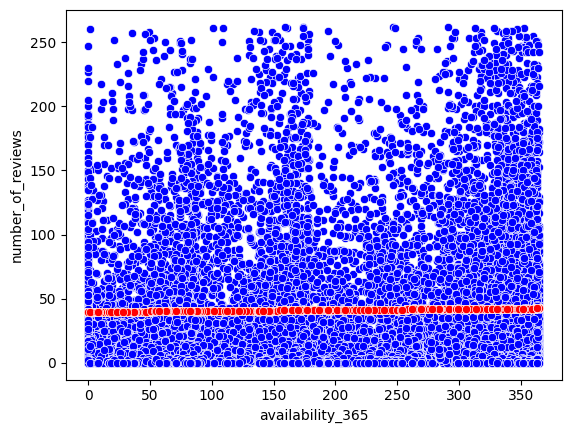

In [59]:
#Visualizamos la gráica comparativa

sns.scatterplot(x='availability_365', y='number_of_reviews', color='blue', data=df_home_apt)
sns.scatterplot(x='availability_365', y='Predict5', color='red', data=df_home_apt)

In [60]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo (R cuadrada)
coef_Deter=model.score(X=Vars_Indep, y=var_Dep)
coef_Deter
#Más cercano al 0 es malo (no hay relación) y más cercano a 1 es bueno (Perfecto)

0.0003168144609013712

In [61]:
#Corroboramos cual es el coeficiente de correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl
##Más cercano al 0 es malo (no hay relación) y más cercano a 1 es bueno (Perfecto)

0.017799282595132065

# Filtro para “reviews_per_month vs review_scores_communication”

<Axes: xlabel='reviews_per_month', ylabel='review_scores_communication'>

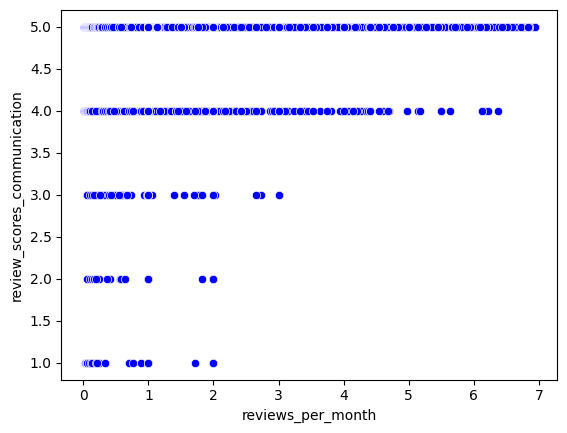

In [62]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión
from turtle import color

sns.scatterplot(x = 'reviews_per_month', y='review_scores_communication', color="blue", data=df_home_apt)

In [63]:
#Declaramos las variables dependientes e independientes para la regresión lineal

Vars_Indep= df_home_apt[['reviews_per_month']]
var_Dep= df_home_apt['review_scores_communication']

In [64]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [65]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [66]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=var_Dep)

LinearRegression()

In [67]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['reviews_per_month'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.02832046]),
 'rank_': 1,
 'singular_': array([179.97201249]),
 'intercept_': 4.885461822794233}

**Modelo matemático: Y = 0.02832046x + 4.885461822794233**

In [68]:
#Predecimos los valores de review_scores_communication a partir de la variable reviews_per_month
y_pred= model.predict(X=df_home_apt[['reviews_per_month']])
y_pred

array([4.89707321, 4.91746394, 4.89735642, ..., 4.91746394, 4.91746394,
       4.91746394])

In [69]:
#Insertamos la columna de predicciones en el DataFrame
df_home_apt.insert(5, 'Predict6', y_pred)
df_home_apt

,Predict1,Predict2,Predict3,Predict4,Predict5,Predict6,room_type_num,host_acceptance_rate,host_response_rate,review_scores_location,review_scores_cleanliness,price,availability_365,number_of_reviews,reviews_per_month,review_scores_communication,number_of_reviews_ltm
0,94.911765,92.439035,39.102604,4.927418,41.583755,4.897073,0,88.0,100.0,5.0,5.0,1652.0,262,56.0,0.41,5.0,3
1,32.863186,93.768785,40.012069,4.927418,42.341469,4.917464,0,89.8,0.0,5.0,5.0,3663.0,363,0.0,1.13,5.0,0
2,94.911765,92.189748,41.123638,4.927418,42.348971,4.897356,0,92.0,100.0,5.0,5.0,1275.0,364,64.0,0.42,5.0,0
3,94.911765,91.884917,43.144672,4.389994,41.388700,4.919163,0,96.0,100.0,4.0,5.0,814.0,236,161.0,1.19,5.0,6
4,88.086421,92.618230,25.965881,4.927418,42.326465,4.894524,0,62.0,89.0,5.0,5.0,1923.0,361,49.0,0.32,5.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26531,94.911765,96.537389,45.165707,4.927418,42.356474,4.917464,0,100.0,100.0,5.0,5.0,7850.0,365,0.0,1.13,5.0,0
26532,93.050308,92.323979,40.618379,4.927418,42.341469,4.917464,0,91.0,97.0,5.0,5.0,1478.0,363,0.0,1.13,5.0,0
26533,94.911765,91.965588,45.165707,4.927418,42.341469,4.917464,0,100.0,100.0,5.0,5.0,936.0,363,0.0,1.13,5.0,0
26534,94.911765,91.854500,45.165707,4.927418,41.523738,4.917464,0,100.0,100.0,5.0,5.0,768.0,254,0.0,1.13,5.0,0


<Axes: xlabel='reviews_per_month', ylabel='review_scores_communication'>

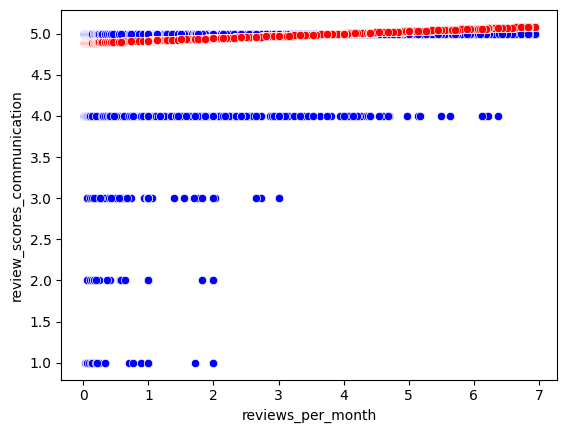

In [70]:
#Visualizamos la gráica comparativa

sns.scatterplot(x='reviews_per_month', y='review_scores_communication', color='blue', data=df_home_apt)
sns.scatterplot(x='reviews_per_month', y='Predict6', color='red', data=df_home_apt)

In [71]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo (R cuadrada)
coef_Deter=model.score(X=Vars_Indep, y=var_Dep)
coef_Deter
#Más cercano al 0 es malo (no hay relación) y más cercano a 1 es bueno (Perfecto)

0.015270538439908332

In [72]:
#Corroboramos cual es el coeficiente de correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl
##Más cercano al 0 es malo (no hay relación) y más cercano a 1 es bueno (Perfecto)

0.12357402008475864

## Creación del modelo matemático

In [73]:
# Modelo usando las regresiones lineales
dfModel = df_home_apt[df_home_apt["room_type_num"] == 0]
dfModel = dfModel.drop("room_type_num", axis = 1)

In [74]:
# Correlación de 'number_of_reviews' con las demás y filtrando las correlaciones fuertes
ReviewsModel = abs(dfModel.corr()['number_of_reviews'])
ReviewsModel = ReviewsModel[ReviewsModel.abs() > 0.2].sort_values(ascending=False).to_frame()
ReviewsModel

,number_of_reviews
number_of_reviews,1.000000
number_of_reviews_ltm,0.557621
Predict6,0.474446
reviews_per_month,0.474446


<Axes: >

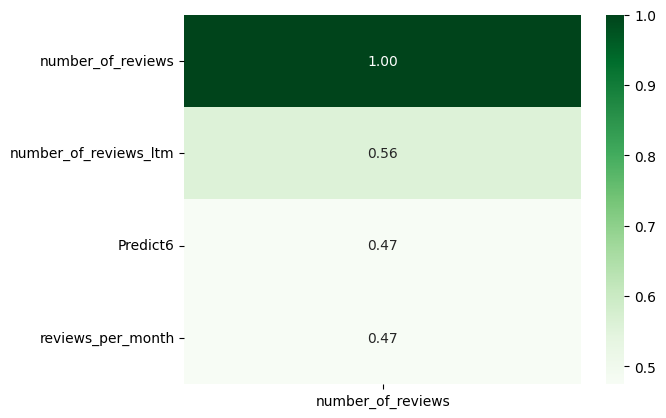

In [75]:
# Gráficamos el mapa de calor de los coeficientes de correlación
Heat_Map1 = sns.heatmap(ReviewsModel, cmap = 'Greens', annot = True, fmt = ".2f")
Heat_Map1


In [76]:
# Modelo original
df = df[df["room_type_num"] == 0]
df = df.drop("room_type_num", axis = 1)
df

# Separamos los datos cuantitativos
dfModel_2 = df.select_dtypes(np.number)
dfModel_2

,host_id,host_since,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,...,availability_365,number_of_reviews,reviews_per_month,price,beds,amenities_num,neighbourhood_cleansed_num,host_response_time_num,bathroom_text_num,neighbourhood_Category_num
0,4796027,2013,100.0,88.0,1.0,3,1,1,19.420630,-99.165860,...,262,56.0,0.41,1652.0,2.0,56.0,4,3,3,1
1,153786,2010,0.0,89.8,0.0,1,1,1,19.382830,-99.271780,...,363,0.0,1.13,3663.0,1.0,12.0,3,0,3,2
2,196253,2010,100.0,92.0,1.0,17,1,1,19.411620,-99.177940,...,364,64.0,0.42,1275.0,2.0,26.0,4,3,3,1
3,4647293,2013,100.0,96.0,1.0,1,1,1,19.439560,-99.172630,...,236,161.0,1.19,814.0,3.0,36.0,9,3,3,2
4,334451,2011,89.0,62.0,1.0,3,1,1,19.411520,-99.168570,...,361,49.0,0.32,1923.0,2.0,21.0,4,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26531,19255745,2014,100.0,100.0,1.0,13,1,1,19.404546,-99.168252,...,365,0.0,1.13,7850.0,2.0,31.0,4,3,3,1
26532,7681206,2013,97.0,91.0,0.0,33,1,1,19.420567,-99.166263,...,363,0.0,1.13,1478.0,2.0,48.0,4,3,3,1
26533,50951150,2015,100.0,100.0,2.0,12,1,1,19.408648,-99.170992,...,363,0.0,1.13,936.0,1.0,39.0,4,3,3,1
26534,147254250,2017,100.0,100.0,1.0,3,1,1,19.412367,-99.166447,...,254,0.0,1.13,768.0,2.0,10.0,4,3,3,1


In [77]:
# Correlación de 'number_of_reviews' con las demás y filtrando las correlaciones fuertes
ReviewsModel_2 = abs(dfModel_2.corr()['number_of_reviews'])
ReviewsModel_2 = ReviewsModel_2[ReviewsModel_2.abs() > 0.2].sort_values(ascending=False).to_frame()
ReviewsModel_2

,number_of_reviews
number_of_reviews,1.000000
number_of_reviews_ltm,0.557621
reviews_per_month,0.474446
number_of_reviews_l30d,0.306091
maximum_nights_avg_ntm,0.263553


<Axes: >

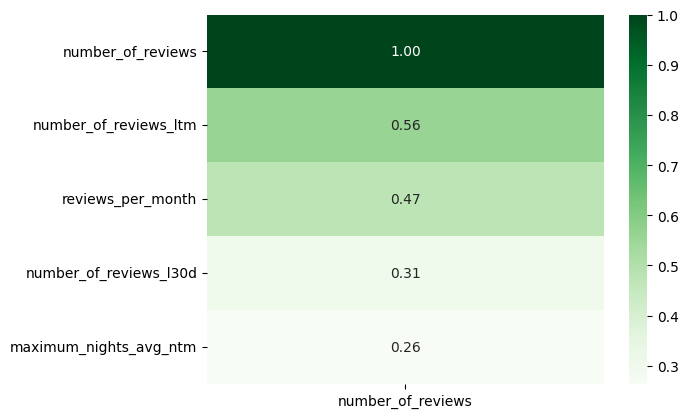

In [78]:
# Gráficamos el mapa de calor de los coeficientes de correlación
Heat_Map2 = sns.heatmap(ReviewsModel_2, cmap = 'Greens', annot = True, fmt = ".2f")
Heat_Map2

<Axes: xlabel='number_of_reviews_ltm', ylabel='number_of_reviews'>

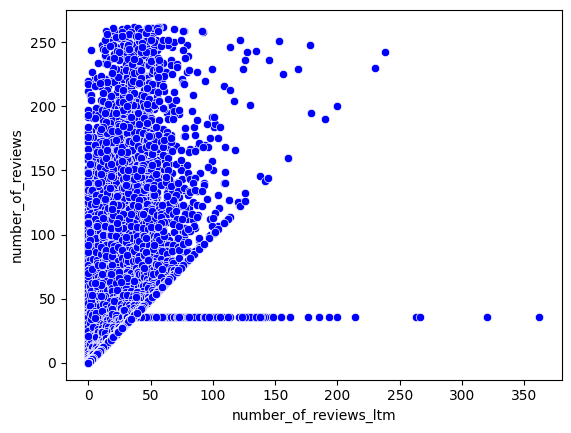

In [79]:
#Para "Entire Home / Apt
#El mejor modelo matemático simple que describe de mejor manera el número de reseñas es:
from turtle import color
sns.scatterplot(x = 'number_of_reviews_ltm', y = 'number_of_reviews', color = 'blue', data = df_home_apt)

In [80]:
# Declaramos las variables dependientes e independientes de la regresión lineal
Vars_Indep = df_home_apt[["number_of_reviews_ltm"]]
Var_Dep = df_home_apt[["number_of_reviews"]]

In [81]:
model = LinearRegression()
# Ajustamos el modelo con las variables declaradas
model.fit(X = Vars_Indep, y = Var_Dep)
# Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews_ltm'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([[1.40424865]]),
 'rank_': 1,
 'singular_': array([2699.08026726]),
 'intercept_': array([18.69371804])}

**Modelo matemático: Y = 1.40424865x + 18.69371804**

In [82]:
# Predecimos los valores de "number_of_reviews" a partir de la variable "number_of_reviews_ltm"
y_pred = model.predict(X = df_home_apt[['number_of_reviews_ltm']])
y_pred
# Insertamos la columna de preddiciones en el df
df_home_apt.insert(6, 'PredictFinal', y_pred)
df_home_apt

,Predict1,Predict2,Predict3,Predict4,Predict5,Predict6,PredictFinal,room_type_num,host_acceptance_rate,host_response_rate,review_scores_location,review_scores_cleanliness,price,availability_365,number_of_reviews,reviews_per_month,review_scores_communication,number_of_reviews_ltm
0,94.911765,92.439035,39.102604,4.927418,41.583755,4.897073,22.906464,0,88.0,100.0,5.0,5.0,1652.0,262,56.0,0.41,5.0,3
1,32.863186,93.768785,40.012069,4.927418,42.341469,4.917464,18.693718,0,89.8,0.0,5.0,5.0,3663.0,363,0.0,1.13,5.0,0
2,94.911765,92.189748,41.123638,4.927418,42.348971,4.897356,18.693718,0,92.0,100.0,5.0,5.0,1275.0,364,64.0,0.42,5.0,0
3,94.911765,91.884917,43.144672,4.389994,41.388700,4.919163,27.119210,0,96.0,100.0,4.0,5.0,814.0,236,161.0,1.19,5.0,6
4,88.086421,92.618230,25.965881,4.927418,42.326465,4.894524,24.310713,0,62.0,89.0,5.0,5.0,1923.0,361,49.0,0.32,5.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26531,94.911765,96.537389,45.165707,4.927418,42.356474,4.917464,18.693718,0,100.0,100.0,5.0,5.0,7850.0,365,0.0,1.13,5.0,0
26532,93.050308,92.323979,40.618379,4.927418,42.341469,4.917464,18.693718,0,91.0,97.0,5.0,5.0,1478.0,363,0.0,1.13,5.0,0
26533,94.911765,91.965588,45.165707,4.927418,42.341469,4.917464,18.693718,0,100.0,100.0,5.0,5.0,936.0,363,0.0,1.13,5.0,0
26534,94.911765,91.854500,45.165707,4.927418,41.523738,4.917464,18.693718,0,100.0,100.0,5.0,5.0,768.0,254,0.0,1.13,5.0,0


<Axes: xlabel='number_of_reviews_ltm', ylabel='number_of_reviews'>

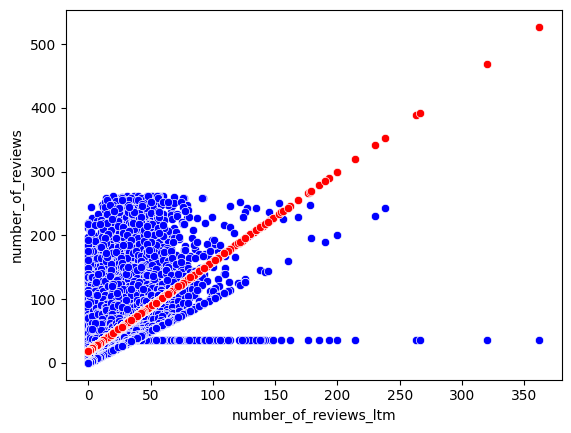

In [83]:
# Gráfica de comparación
sns.scatterplot(x = 'number_of_reviews_ltm', y = 'number_of_reviews', color = 'blue', data = df_home_apt)
sns.scatterplot(x = 'number_of_reviews_ltm', y = 'PredictFinal', color = "red", data = df_home_apt)

In [84]:
# Coeficiente de determinación de nuestro modelo (R cuadrada)
coefDeterFinal = model.score(X = Vars_Indep, y = Var_Dep)
coefDeterFinal # Más



0.3109416175689521

In [85]:
# Corroboramos el coeficiente de correlación de nuestro modelo
coefCorrelFinal = np.sqrt(coefDeterFinal)
coefCorrelFinal # Más cercano al 0 es malo (No hay relación) y más cercano al 1 es bueno (Perfecto)

0.5576213926751306